# Project 2a: Alloy cluster expansions

In this project you will explore different methods for constructing an alloy cluster expansion model for the Au-Cu alloy, using various levels of physical intuition in the model construction process.
This physical intuition will be instilled through more and more complex priors, ranging from the completely uninformative prior of OLS to a full Bayesian analysis where the prior hyperparameters are sampled as well.
The different cluster expansion models are then applied to the problem of predicting the ground state structure amongst a few different candidates. 

Note that it is not required for you to understand all the details of the cluster expansion (CE) formalism to solve the project.

**You should hand in a report, via Canvas, maximum 6 pages (excluding references). 
Do not attach any appendices.
In the report you should present your data, models and the final results.
Do not forget to visualize your data and results.
It is important that you discuss your findings and reflect on the results.
In addition you need to hand in your Python code.
Your code should run without errors and upon inspection reproduce the main results you present in the report.
We will award extra points for code that we deem well written and structures (but we will not deduct points in the opposite case).
Emphasis will be put on your ability to use appropriate terminology to describe and discuss the employed statistical methodologies and results.
Please use the LaTeX template for reports that is provided on the homepage.**

**<font color=red>DEADLINE: Tuesday, Dec 3, 23:59</font>**


## Alloys
In order to study alloys on the atomic scale one can resort to density functional theory (DFT) calculations.
DFT can provide the energy of a given atomistic structure with high accuracy.
The database that we provide you with is based on DFT calculations.

The mixing energy per atom of a structure is defined as
\begin{equation}
\large
    E_\text{mix} = \frac{E_\text{structure} - n_\text{Au} E_\text{Au} - n_\text{Cu} E_\text{Cu}}{n_\text{Au} + n_\text{Cu}}
\end{equation}
where $E_\text{structure}$ is the total energy of the structure, $n_\text{Au}$ number of Au atoms in the structure and $E_\text{Au}$ the energy of pure Au.
Working with the mixing energy is often convient as it is the relevant energy when considering, e.g., phase stability of alloys.
Below a few different structures (configurations) are displayed.

<img src="images/configurations.png" alt="Drawing" style="width: 750px;"/>




## The configurational space problem
If we consider a binary system (A-B) and a lattice consisting of 100 atoms, this yields $2^{100}\approx 10^{30}$ unique ways of occupaying the lattice.
While many of the structures will be duplicates when considering translation and rotational invariance we are still left with a huge number of configurations that would need to be considered for, e.g., thermodynamic averages or ground state searches.

Calculating the energy of multiple structures with DFT is computationally very expensive and thus to solve this configurational space problem one often turns to building atomistic models based on DFT.
One of the more common atomistic models to employ is the alloy cluster expansion.


## Cluster expansions
The alloy cluster expansion is a model based on a perfect lattice.
This lattice can be occupied by various chemical species (Au and Cu in our case).
In this approach the energy of the atomic structure is modeled as a sum over the orbits times their corresponding effective cluster interaction.
In principle it looks like
\begin{equation}
\large
E_{mix} = J_0 + \sum_\alpha m_\alpha J_\alpha,
\end{equation}
where $\alpha$ refers to different orbits such as nearest neighbor pairs, next nearest neighbor pairs, triplets etc, $m_\alpha$ is the multiplicity, i.e. the number of symmetry equivalent clusters in the orbit per unit cell, and $J_\alpha$ is the corresponding effective cluster interaction (ECI).
In this project, we are not concerned with the details of decomposing a structure into orbits but simply use the [`icet` package](https://icet.materialsmodeling.org) for this purpose.

<img src="images/clusters_v1.png" alt="Drawing" style="width: 650px;"/>


Instead we focus on how to determine the unknown parameters (ECIs) for the cluster expansion model, and how to choose which type of clusters (orbits) to include in the model.
The equation above can be formulated as a dot product by defining $\boldsymbol{\xi}=[1, N_1, N_2, ...]$ and $\boldsymbol{J}=[J_0, J_1, J_2, ...]$ as $E_{mix} = \boldsymbol{\xi} \boldsymbol{J}$.
Here, $\boldsymbol{\xi}$ is often refered to the cluster vector of the given configuration.

If the mixing energy, $E_{mix}$, is provided, e.g., from DFT calculations, for a set of configurations, then the problem of finding the ECIs, $\boldsymbol{J}$, can be cast in the form of OLS
\begin{equation}
\large
\boldsymbol{J}_{opt} = \min \boldsymbol{J} || \boldsymbol{X} \boldsymbol{J} - \boldsymbol{E_{mix}} ||_2 ^2,
\end{equation}
where $\boldsymbol{E}_{mix}$ is a vector containing the mixing energies for all structures and $\boldsymbol{X}$ a matrix where each row corresponds to a cluster vector one of the given structures.


## The linear problem
Simplest way to solve the linear problem would be to use ordinary least-squares (OLS). However, OLS tends to overfit and thus linear regression with regularization such as Ridge and LASSO are feasible alternatives.

A common issue in finding the ECIs is to select an approriate number of features (clusters) to include in the model. Features in our problem would corresponds to clusters with various interatomic distances and order. Too few can lead to underfitting and too many to overfitting. 

In this project you will construct cluster-expansion model using linear regression methods such as Lasso and ARDR. You will use cross-validation but also information criteria such as AIC and BIC in order to evaluate how many features is reasonable to include in your cluster expansion. For more information and details about these methods and metrics, see the lecture notes.

Lastly, you will see how bayesian parameter estimation of the ECIs can be used for cluster-expansion.

### Cross validation
You may freely chose a suitable cross-valdation method to use for the following tasks. K-fold is commonly used and available through `sklearn` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html). Ten folds might be a good starting point to try out.

### Information criteria
The Bayesian information criteria (BIC) is defined as
\begin{equation}
\text{BIC} = 2 log(L_*) - N_p log(N_d)
\end{equation}
where $L_*$ is the maximized likelihood, $N_p$ the number of parameters, and $N_d$ number of data points.     
The energies (or data) can be modeled through
Here we assume the errors, $\epsilon$, are normal distributed with zero mean and variance $\sigma^2$.
\begin{equation}
\boldsymbol{E} = \boldsymbol{\xi} \boldsymbol{J} + \epsilon , \quad \epsilon \sim \mathcal{N}(\mu=0, \sigma^2) \\
\end{equation}
Therefore the likelihood, $P(D|\boldsymbol{J}, \sigma)$, can be defined as
\begin{equation}
L = P(D|\boldsymbol{J}, \sigma) = \frac{1}{(2\pi \sigma^2)^{N_d/2}}\exp{(-||\boldsymbol{X} \boldsymbol{J}-\boldsymbol{E} ||^2 / 2\sigma^2)}
\end{equation}
The ECIs, $\boldsymbol{J}$, you will obtain from linear regression algorithms (LASSO, etc), and $\sigma$ can be found from setting $\frac{\mathrm{d} L }{\mathrm{d} \sigma} = 0$. This is left as an exercise to the reader but final expression for BIC becomes
\begin{equation}
\text{BIC} = -N_d log(\text{MSE}) - N_p log(N_d) + \text{const}
\end{equation}
where the constant term, $\text{const}$, is irrelevant and $\text{MSE}$ is the mean squared error, defined as 
\begin{equation}
\text{MSE} = \frac{1}{N_d}||\boldsymbol{X} \boldsymbol{J}-\boldsymbol{E} ||^2
\end{equation}

### sklearn
Regression algorithms like OLS, Ridge, ARDR (and many more) are available in `sklearn`. One can also use the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) from `sklearn` to standardize data. 

*Note: Since we're including the constant term in our cluster vectors we need to set `fit_intercept=False` when using the linear models from sklearn.*

## Additional information
For more information, see the lecture notes as well as the demos. 
For Task 3, a similar analysis is performed in the notebook `ce-with-covariance-matrix.ipynb`.

Additional information in regards to cluster expansions and how these can be trained and used can be found in the  following papers:

* Robust data-driven approach for predicting the configurational energy of high entropy alloys (doi.org/10.1016/j.matdes.2019.108247)
* [`icet`](https://icet.materialsmodeling.org) – A Python Library for Constructing and Sampling Alloy Cluster Expansions (doi.org/10.1002/adts.201900015)
* Covariance regularization by Mueller et al. [Physical Review B **80**, 024103 (2009)](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.80.024103)

In this project, you are provided with data in the form of [ASE databases](https://wiki.fysik.dtu.dk/ase/ase/db/db.html). Please see the notebook `introduction-to-ase.ipynb` for further details on how to read such databases and an introduction to ASE in general, and the notebook `introduction-to-cluster-expansions.ipynb` for tips on working with cluster expansions.

## Setup

In [2]:
import ase
import icet
from ase.db import connect

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
import sklearn
import pandas as pd
import emcee
import corner
import random

sns.set_context('notebook')

# LaTeX font
plt.style.use('default')
plt.rc('text', usetex = True)
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
font_size = 18
plt.rcParams['font.size'] = font_size

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

sns.set_palette('deep')

## Task 1: Prepare data (1.5p)

The data can be found in the ASE database `AuCu-structures.db`.
Here each row corresponds to an atomic structure with an attached mixing energy in units of eV per atom.
Use fixed cutoff radii of 8 Å, 6 Å, and 5 Å for pairs, triplets, and quadruplets.

**Task:** 
* Read the database and collect the atomic structures and energies.
* Plot the mixing energy as a function of Cu concentration
* Standardize the mixing energy $E$ and the cluster vectors $X$. 

**Discuss:**
* Why is it good practice to standardize the data? Is it necessary in this case?

*Hints:*
- The mixing energy for a structure can be retrieved by accessing the `mixing_energy` field on the row corresponding to that structure, like `E_mix = row.mixing_energy`.

ase db AuCu-structures.db

In [3]:
# Read ASE database and collect structures + mixing energies
def read_db(db_path):
    db = connect(db_path)

    structures = []
    mixing_energies = []
    # metadata = []

    for row in db.select():
        atoms = row.toatoms()   # Atoms object
        structures.append(atoms)
        try:
            E_mix = row.mixing_energy
        except:
            # print(f'No mixing energy for row id {row.id}')
            E_mix = None
        mixing_energies.append(E_mix)
        # metadata.append({
        #     'row_id': row.id,
        #     'formula': row.formula,
        #     'volume': row.volume,
        #     'natoms': row.natoms,
        #     'mass': row.mass
        # })

    mixing_energies = np.asarray(mixing_energies)
    # metadata_df = pd.DataFrame(metadata)
    return structures, mixing_energies, db

db_path = 'AuCu-structures.db'

structures, mixing_energies, db = read_db(db_path)

print(f'Loaded {len(structures)} structures.')
print(f'Mixing energy mean: {mixing_energies.mean():.4f} eV/atom')
# print(metadata_df)
print(mixing_energies[0])

Loaded 52 structures.
Mixing energy mean: -0.0314 eV/atom
0.003071504732031463


In [4]:
prim = db.get(formula='Au').toatoms()
cs = icet.ClusterSpace(prim, cutoffs=[8, 6, 5], chemical_symbols=['Au', 'Cu'])
print(cs)

====================================== Cluster Space ======================================
 space group                            : Fm-3m (225)
 chemical species                       : ['Au', 'Cu'] (sublattice A)
 cutoffs                                : 8.0000 6.0000 5.0000
 total number of parameters             : 24
 number of parameters by order          : 0= 1  1= 1  2= 7  3= 12  4= 3
 fractional_position_tolerance          : 2e-06
 position_tolerance                     : 1e-05
 symprec                                : 1e-05
-------------------------------------------------------------------------------------------
index | order |  radius  | multiplicity | orbit_index | multicomponent_vector | sublattices
-------------------------------------------------------------------------------------------
   0  |   0   |   0.0000 |        1     |      -1     |           .           |      .     
   1  |   1   |   0.0000 |        1     |       0     |          [0]          |      A     


In [5]:
cs_ARDR = icet.ClusterSpace(prim, cutoffs=[13, 8, 6], chemical_symbols=['Au', 'Cu'])
display(cs_ARDR)

Field,Value
Space group,Fm-3m (225)
Sublattice A,"('Au', 'Cu')"
Cutoffs,"[13, 8, 6]"
Total number of parameters,104
Number of parameters of order 0,1
Number of parameters of order 1,1
Number of parameters of order 2,24
Number of parameters of order 3,43
Number of parameters of order 4,35
fractional_position_tolerance,2e-06


In [6]:
# Build cluster-vector matrix X and a pandas DataFrame `conc_df` with composition and energies
def build_cluster_matrix(structures, mixing_energies, cs):
    X_rows = []
    rows = []

    for i, structure in enumerate(structures):
        vec = cs.get_cluster_vector(structure=structure)
        X_rows.append(vec)

        n = structure.get_number_of_atoms()
        cu_frac = structure.symbols.count('Cu') / n
        au_frac = structure.symbols.count('Au') / n
        try:
            mixing_per_atom = mixing_energies[i]
        except:
            mixing_per_atom = None
        mixing_total = mixing_per_atom * n if mixing_per_atom is not None else None

        rows.append({
            'Cu_fraction': cu_frac,
            'Au_fraction': au_frac,
            'mixing_energy_per_atom': mixing_per_atom,
            'mixing_energy_total': mixing_total,
            'n_atoms': n,
        })

    # Convert X to array (shape: n_structures x n_features)
    X = np.vstack(X_rows)

    # Create DataFrame
    df = pd.DataFrame(rows)

    return X, df

X, conc_df = build_cluster_matrix(structures, mixing_energies, cs)

print(f'X shape: {X.shape}')
print(conc_df.head())

X shape: (52, 24)
   Cu_fraction  Au_fraction  mixing_energy_per_atom  mixing_energy_total  \
0     0.000000     1.000000                0.003072             0.003072   
1     1.000000     0.000000               -0.002671            -0.002671   
2     0.500000     0.500000                0.012795             0.025589   
3     0.333333     0.666667               -0.015187            -0.045562   
4     0.666667     0.333333               -0.020937            -0.062810   

   n_atoms  
0        1  
1        1  
2        2  
3        3  
4        3  


/var/folders/cc/g7htxfj57sq65d7g1185yzwr0000gn/T/ipykernel_34051/486745711.py:10: FutureWarning: Please use len(self) or, if your atoms are distributed, self.get_global_number_of_atoms.
  n = structure.get_number_of_atoms()


### Plot mixing energy in eV

[0.         0.2        0.25       0.33333333 0.4        0.5
 0.6        0.66666667 0.75       0.8        1.        ]


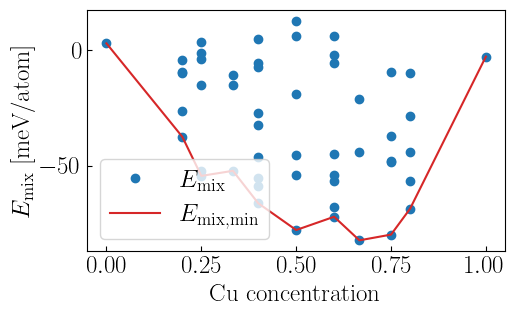

In [7]:

def plot_mixing_energies(conc_df, fig=None, size=(5.5,3.5)):
    E_min = []

    idx = np.unique(conc_df['Cu_fraction'])
    print(idx)
    for i in range(len(idx)):
        energies = conc_df['mixing_energy_per_atom'][idx[i] == conc_df['Cu_fraction']]
        E_min.append(np.min(energies))

    if fig is None:
        plt.figure(figsize=size)
    plt.plot(conc_df['Cu_fraction'], conc_df['mixing_energy_per_atom']*1000, 'o', color='tab:blue', label=r'$E_{\mathrm{mix}}$')
    plt.plot(idx, np.array(E_min)*1000, '-', label=r'$E_{\mathrm{mix, min}}$', color='tab:red')
    plt.xlabel('Cu concentration')
    plt.ylabel(r'$E_{\mathrm{mix}}$ [meV/atom]')
    return fig

fig = plot_mixing_energies(conc_df)
plt.tight_layout()
plt.legend(loc='lower left')
plt.savefig('figs/mixing_energies.pdf')

### Standardize data

In [8]:
def standardize(X):
    scaler_X = sklearn.preprocessing.StandardScaler()
    X_stand = scaler_X.fit_transform(X)
    return X_stand, scaler_X

def de_standardize(X_stand, scaler_X):
    X = scaler_X.inverse_transform(X_stand)
    return X

def de_standardize_J(J_stand, scaler_X, scaler_E):
    sigma_E = scaler_E.scale_[0]
    mu_E    = scaler_E.mean_[0]
    sigma_X = scaler_X.scale_
    mu_X    = scaler_X.mean_

    # coefficients in original units
    J_phys = J_stand * (sigma_E / sigma_X)

    # intercept term
    intercept = mu_E - np.dot(mu_X, J_phys)
    return J_phys, intercept

def pred(X, J):
    # Standardized
    E_pred = X @ J
    return E_pred

def pred_de_standardized(X, J, intercept):
    E_pred = X @ J + intercept
    return E_pred

Text(0, 0.5, 'Mixing energy (eV/atom)')

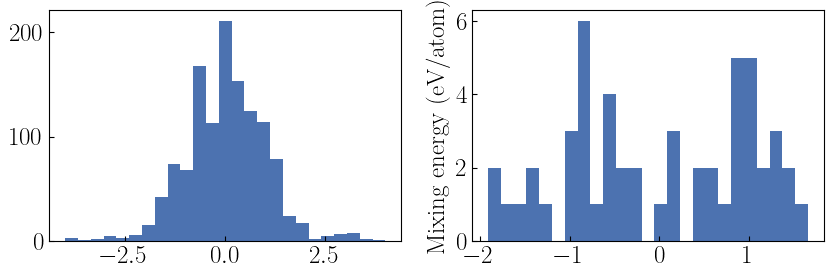

In [9]:
X_stand, scaler_X = standardize(X)
X_stand[:,0] = 1  # Set constant term to 1

E_stand, scaler_E = standardize(mixing_energies.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,3))
axes[0].hist(X_stand.flatten(), bins=25)
axes[1].hist(E_stand.flatten(), bins=25)
axes[1].set_ylabel('Mixing energy (eV/atom)')

## Task 2: OLS and ridge regression (2p)

Use OLS and ridge to fit the ECIs. You may use routines from, e.g., scikit-learn.

Ridge regression uses a hyperparameter $\alpha$ to penalize large values for the ECIs, by using the following loss function: 

$$ 
L = ||E - XJ||^2 + \alpha ||J||^2
$$

where $E$ is the mixing energy and $x$ the design matrix of cluster vectors and $J$ the ECIs. The solution $J_{opt}$ that minimizes $L$  can then be written as:

$$ 
J_{opt, Ridge} = (X^T X + \alpha I)^{-1} X^T E
$$

**Tasks**
* Fit ECIs using OLS and ridge regression
    * Use k-fold cross validation to find a good value for $\alpha$. 
* Compare the CV-RMSE and size of the ECIs between OLS and Ridge. The ECIs can for instance be plotted in a bar chart.

**Discuss**
* What are the qualitative differences between OLS and Ridge?

*Note: Since the constant term is included in our cluster vectors we need to set `fit_intercept=False` when using the linear models from sklearn.*

### OLS

In [10]:
J_ols = np.linalg.lstsq(X_stand, E_stand, rcond=None)[0].ravel()
print(J_ols)

[ 2.44519561e-16  5.65847276e-01  7.26548876e-01 -4.54981714e-01
  6.46060613e-02  1.06686803e-01  1.76165959e-01 -5.25979792e-01
 -3.89064372e-02 -1.26382247e-01 -2.26633167e-01 -2.20121341e-02
  1.00296208e-01  1.34408766e-02 -1.12144440e-01 -6.73001167e-02
  9.51995323e-02 -1.24349444e-01  2.01324074e-02  9.80851113e-02
 -6.67224509e-03  2.03959756e-01  8.71344181e-03 -3.49079025e-04]


### Ridge

In [11]:
# Fit ECI and find best alpha

kf = sklearn.model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

alphas = [1e-3, 1e-2, 1e-1, 1]
clf = sklearn.linear_model.RidgeCV(alphas=alphas, cv=kf, fit_intercept=False)
clf.fit(X_stand, E_stand) # X design matrix, E targets
J_ridge = clf.coef_
print(f'ECI vector: {J_ridge}')
print(f'Optimal alpha: {clf.alpha_}')


ECI vector: [ 2.50447360e-16  5.37387513e-01  7.19645294e-01 -4.46132293e-01
  5.86873909e-02  1.09134662e-01  1.79637767e-01 -5.28042088e-01
 -4.05333283e-02 -1.06277726e-01 -2.24840532e-01 -4.44854293e-02
  7.64431450e-02  9.85852691e-03 -1.16047210e-01 -4.15005496e-02
  9.23592141e-02 -1.13286567e-01  3.24192702e-02  1.04078813e-01
  6.78933965e-04  1.95566198e-01  1.89563060e-02 -1.69762470e-03]
Optimal alpha: 0.1


### CV-RMSE

In [ ]:
def compute_rmse(y_true, y_pred):
    dy = y_true - y_pred
    rmse = np.sqrt(np.mean(dy**2))
    return rmse

def split_data(X_stand, E_stand, E_phys, train_index, test_index):
    X_train, X_test = X_stand[train_index], X_stand[test_index]
    E_train, E_test = E_stand[train_index], E_stand[test_index]
    # True targets in physical units
    E_train_phys, E_test_phys = E_phys[train_index], E_phys[test_index]
    return X_train, X_test, E_train, E_test, E_train_phys, E_test_phys

def predict_phys_to_rmse(ridge_rmse_valid_folds, ridge_rmse_train_folds, 
                         X_train, X_test, J_stand, E_train_phys, E_test_phys):
    # Predictions in standardized space
    E_pred_train_stand = X_train @ J_stand
    E_pred_test_stand  = X_test @ J_stand

    # Back to physical units
    E_pred_train = scaler_E.inverse_transform(E_pred_train_stand.reshape(-1, 1)).ravel()
    E_pred_test = scaler_E.inverse_transform(E_pred_test_stand.reshape(-1, 1)).ravel()

    # RMSE in physical units (eV/atom)
    rmse_train = compute_rmse(E_train_phys, E_pred_train)
    rmse_valid = compute_rmse(E_test_phys, E_pred_test)

    ridge_rmse_valid_folds.append(rmse_valid)
    ridge_rmse_train_folds.append(rmse_train)

    return ridge_rmse_valid_folds, ridge_rmse_train_folds


# Run Kfold loop with optimal alpha to determine RMSE for each fold
def cv_rmse_ridge(alpha, X_stand=X_stand, E_stand=E_stand, kf=kf):
    # Assuming validation and test data are the same here
    ridge_rmse_valid_folds = []
    ridge_rmse_train_folds = []

    E_phys = scaler_E.inverse_transform(E_stand.reshape(-1, 1)).ravel()

    for i, (train_index, test_index) in enumerate(kf.split(X_stand)):
        # Split data
        X_train, X_test, E_train, E_test, E_train_phys, E_test_phys = split_data(X_stand, E_stand, E_phys, train_index, test_index)
        
        # Fit data in standardized space
        ridge = sklearn.linear_model.Ridge(alpha=alpha, fit_intercept=False, max_iter=50000, tol=1e-6)
        ridge.fit(X_train, E_train)
        J_stand = ridge.coef_

        # Predictions and RMSE in standardized space
        ridge_rmse_valid_folds, ridge_rmse_train_folds = predict_phys_to_rmse(ridge_rmse_valid_folds, ridge_rmse_train_folds,
                                                                              X_train, X_test, J_stand, E_train_phys, E_test_phys)

    # Cross validate over the folds
    cv_rmse_valid = np.mean(ridge_rmse_valid_folds)
    cv_rmse_train = np.mean(ridge_rmse_train_folds)

    return cv_rmse_valid, cv_rmse_train

print(cv_rmse_ridge(clf.alpha_))

(np.float64(0.0028936106345888793), np.float64(0.0015173735700568642))


In [13]:
def mini_valid_alpha(alpha):
    cv_rmse_valid, cv_rmse_train = cv_rmse_ridge(alpha)
    return cv_rmse_valid

from scipy.optimize import minimize

alpha_initial = 0.1
res = minimize(mini_valid_alpha, alpha_initial, bounds=[(1e-5, 1)], tol=1e-10)
optimal_alpha = res.x[0]
print(f'Optimal alpha from minimization: {optimal_alpha}')

Optimal alpha from minimization: 0.017737947514347867


In [14]:
# Run loop kfold to determine RMSE for each fold
def cv_rmse_ols(X_stand=X_stand, E_stand=E_stand, kf=kf):
    # Assuming validation and test data are the same here
    ols_rmse_valid_folds = []
    ols_rmse_train_folds = []

    E_phys = scaler_E.inverse_transform(E_stand.reshape(-1, 1)).ravel()
    
    for i, (train_index, test_index) in enumerate(kf.split(X_stand)):
        # Split data
        X_train, X_test, E_train, E_test, E_train_phys, E_test_phys = split_data(X_stand, E_stand, E_phys, train_index, test_index)
        
        # Fit data in standardized space
        ols = sklearn.linear_model.LinearRegression(fit_intercept=False)
        ols.fit(X_train, E_train)

        J_ols = ols.coef_.ravel()

        ols_rmse_valid_folds, ols_rmse_train_folds = predict_phys_to_rmse(ols_rmse_valid_folds, ols_rmse_train_folds,
                                                                          X_train, X_test, J_ols, E_train_phys, E_test_phys)

    # Cross validate over the folds
    cv_rmse_valid = np.mean(ols_rmse_valid_folds)
    cv_rmse_train = np.mean(ols_rmse_train_folds)

    return cv_rmse_valid, cv_rmse_train

OLS CV RMSE: 2.8877 meV/atom
Ridge CV RMSE at optimal alpha: 2.8872 meV/atom


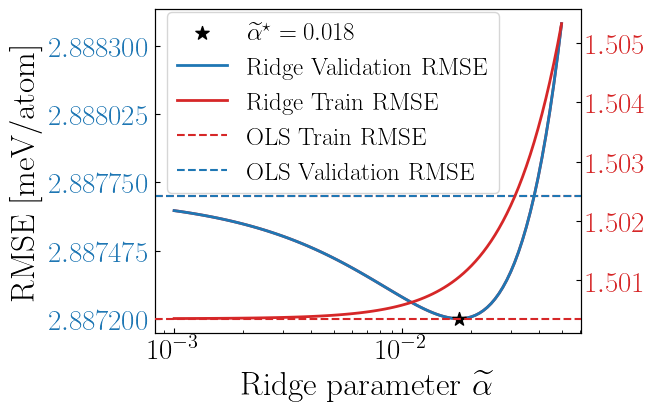

In [95]:
font_size = 21
plt.rcParams['font.size'] = font_size

cv_rmse_valid_vals = []
cv_rmse_train_vals = []

fig, ax1 = plt.subplots(figsize=(7,4.55))
alp_pot_min = 1e-3
alp_pot_max = 5e-2
alphas = np.logspace(np.log10(alp_pot_min), np.log10(alp_pot_max), num=100) #[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
for alpha in alphas:
    rmse_test, rmse_train = cv_rmse_ridge(alpha)
    cv_rmse_valid_vals.append(rmse_test)
    cv_rmse_train_vals.append(rmse_train)

ax2 = ax1.twinx()

rmse_ols_valid, rmse_ols_train = np.array(cv_rmse_ols())*1000
cv_rmse_ridge_opt = np.min(cv_rmse_valid_vals)*1000
print(f'OLS CV RMSE: {rmse_ols_valid:.4f} meV/atom')
print(f'Ridge CV RMSE at optimal alpha: {cv_rmse_ridge_opt:.4f} meV/atom')

ax1.axhline(rmse_ols_valid, color='tab:blue', ls='--', label='OLS Validation RMSE', zorder=5)
ax2.axhline(rmse_ols_train, color='tab:red', ls='--', label='OLS Train RMSE', zorder=6)
ax1.axhline(rmse_ols_valid, color='tab:red', ls='--', label='OLS Train RMSE', zorder=4)

# ax1.axvline(optimal_alpha, color='black', ls='dotted')
ax1.semilogx(alphas, np.array(cv_rmse_valid_vals)*1000, '-', label='Ridge Train RMSE', color='tab:red', zorder=1, lw =  2)
ax1.semilogx(alphas, np.array(cv_rmse_valid_vals)*1000, '-', label='Ridge Validation RMSE', color='tab:blue', zorder=2, lw =  2)
ax2.semilogx(alphas, np.array(cv_rmse_train_vals)*1000, '-', label='Ridge Train RMSE', color='tab:red', zorder=3,lw = 2)

ax1.scatter(optimal_alpha, mini_valid_alpha(optimal_alpha)*1000, marker='*', s=100, zorder=10, color='black', label=fr'$\widetilde\alpha^\star = {optimal_alpha:.3f}$')

ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_yticks(np.linspace(2.8872, 2.8883, 5))
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_yticks(np.linspace(1.501, 1.505, 5))

ax1.set_xlabel(r'Ridge parameter $\widetilde\alpha$', fontsize=24)
ax1.set_ylabel('RMSE [meV/atom]', fontsize=24)
ax1.legend(reverse=True, fontsize=18, loc='upper left', bbox_to_anchor=(0.0,1.03))
plt.tight_layout()
plt.savefig('figs/ridge_cv_rmse.pdf')

In [ ]:
font_size = 18
plt.rcParams['font.size'] = font_size

## Task 3: Covariance matrix for cluster similarity (4p)

Ridge regression regularizes parameters by using the $\alpha$ to penalize larger absolute values of the ECIs. This is a very general approach that works for a broad range of problems, and can be motivated by physical intuition in that smaller parameter values are favored. However, we can improve upon Ridge regression by creating more elaborate regularization schemes that inlcude physical intuition about our specific system. 

One example of such physical intuition is that we expect cluster orbits with more sites and with a larger distance between them to contribute less to the overall energy of the structure than smaller/more compact clusters. In other words, we expect that the ECIs decrease with the number of sites and the size of a orbit. Following the approach outlined Mueller et al. in [Physical Review B **80**, 024103 (2009)](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.80.024103), this can be achieved by modifying the Ridge least-squares estimator as follows: 

$$
J_{opt, Cov} = (X^T X + \Lambda)^{-1} X^T E.
$$

Here, $\Lambda$ is known as the *regularization matrix*. Using this regularization matrix is the same as using the following prior over the ECIs

$$
P(J|X) \propto e^{-J^T \Lambda J /2}.
$$

This is a multivariate normal distribution over the components of $J$ with covariance $\Lambda^{-1}$, and hence we can interpret $\Lambda$ to be the inverse of the covariance matrix for the prior distribution  of $J$. By modifying $\Lambda$, we can thus encode physical intuition similarly to how we usually specify priors in a fully Bayesian approach. 

The elements of $\Lambda$ are given by
$$
\Lambda_{\alpha,\alpha} = \frac{\sigma^2}{\sigma_\alpha^2} + \sum_{\beta | \beta\neq\alpha} \frac{\sigma^2}{\sigma_{\alpha\beta}}\\
\Lambda_{\alpha\beta} = \Lambda_{\beta\alpha} = - \frac{\sigma^2}{\sigma_{\alpha\beta}^2}.
$$

It is useful to consider the extremal cases for the elements of $\Lambda$, using the reduced values $\lambda_{\alpha}=\sigma^2/\sigma_\alpha^2$ and  $\lambda_{\alpha\beta}=\sigma^2/\sigma_{\alpha\beta}^2$.

1. $\lambda_{\alpha} \rightarrow \infty$: force ECI for orbit $\alpha$ to zero (= remove orbit)
1. $\lambda_{\alpha} \rightarrow 0$ and $\lambda_{\alpha\beta} \rightarrow 0$: all ECIs/orbits are equally likely; this recovers OLS
1. $\lambda_{\alpha\beta} \rightarrow 0$: no correlation (coupling) between orbits; this recovers ridge regression if $\lambda_\alpha$ is the same for all orbits
1. $\lambda_{\alpha\beta} \rightarrow \infty$: force two orbits to have the same ECI

In this project we will only focus on the diagonal elements $\lambda_\alpha$, and set the off-diagonal elements $\lambda_{\alpha\beta}=0$. We will thus not merge any cluster orbits. Merging cluster orbits has the benefit of constraining the parameter space, simplifying optimization procedure. See the demo `cluster-expansion-construction` for details.

We can thus encode our prior information/physical intuition that orbits with more sites/larger size should have smaller ECIs by modifying the parameters $\lambda_\alpha$. To demonstrate this approach, we calculate $\lambda_\alpha$ according to the following (linear) regularization scheme

$$ 
\lambda_\alpha(n,r, \gamma) = \gamma_1r+\gamma_2n, 
$$

where $n$ and $r$ is the number of sites and radius of orbit $\alpha$ respectively. $\lambda_\alpha$ grows with larger $n$ and $r$, decreasing the size of that ECI. The problem is now reduced to finding the two optimal hyperparameters $\gamma$, instead of finding all the $\lambda_\alpha$ individually.

**Tasks:**
* Find the hyperparameters $\gamma$ that minimizes the CV-RMSE of the model with $J_{opt, Cov}$.
* Compare the CV-RMSE and the ECIs to OLS and Ridge from Task 2. 

**Discuss:**
* What is the interpretation of having an individual parameter $\lambda_\alpha$ for each orbit? How does this compare to Ridge regression?
* How does the CV-RMSE and the ECIs compare to OLS and Ridge? Can you explain it? 

*Hints*
* You can use, e.g., [`scipy.minimize.optimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) to optimize the hyperparameters $\gamma$. 

In [16]:
r = cs.orbit_list[3].radius
n = len(cs.orbit_list[22].sites)
print(r, n)
# print(cs.orbit_list)

2.5061911192266613 4


In [17]:
def lambs(gamma, n, r):
    return gamma[0] * r + gamma[1] * n

def J_opt_cov(X, E, cov):
    return np.dot(scipy.linalg.pinv(np.dot(X.T, X) + cov), np.dot(X.T, E))

def build_cov(gamma, cs=cs):
    r = [] 
    n = []
    lambdas = []
    lambdas.append(1)  # For constant term
    for i in range(len(cs.orbit_list)):
        r_i = cs.orbit_list[i].radius
        n_i = len(cs.orbit_list[i].sites)
        lambdas.append(lambs(gamma, n_i, r_i))

        r.append(r_i)
        n.append(n_i)
        
    # Covariance matrix
    Lam = np.diag(lambdas)
    return Lam

def cv_rmse_cov(gamma, X_stand=X_stand, E_stand=E_stand, kf=kf):
    # Assuming validation and test data are the same here
    cov_rmse_valid_folds = []
    cov_rmse_train_folds = []

    E_phys = scaler_E.inverse_transform(E_stand.reshape(-1, 1)).ravel()

    for j, (train_index, test_index) in enumerate(kf.split(X_stand)):
        X_train, X_test, E_train, E_test, E_train_phys, E_test_phys = split_data(X_stand, E_stand, E_phys, train_index, test_index)

        # Build covatriance matrix
        Lam = build_cov(gamma)

        # Fit data
        J_cov = J_opt_cov(X_train, E_train, Lam)

        # Predictions and RMSE in standardized space
        cov_rmse_valid_folds, cov_rmse_train_folds = predict_phys_to_rmse(cov_rmse_valid_folds, cov_rmse_train_folds,
                                                                              X_train, X_test, J_cov, E_train_phys, E_test_phys)

    # Cross validate over the folds
    cv_rmse_valid = np.mean(cov_rmse_valid_folds)
    cv_rmse_train = np.mean(cov_rmse_train_folds)

    return cv_rmse_valid, cv_rmse_train

print(cv_rmse_cov([1.0, 1.0]))

(np.float64(0.005324416611021832), np.float64(0.003505651867735479))


In [18]:
def mini_valid_gamma(gamma):
    cv_rmse_valid, cv_rmse_train = cv_rmse_cov(gamma)

    return cv_rmse_valid*1000  # in meV/atom

gamma_init = [1.0, 1.0]
res = scipy.optimize.minimize(mini_valid_gamma, gamma_init)
gamma_opt = res.x

print(f'Optimal gamma: {gamma_opt}')

# Run cross validation with optimal gamma to get RMSE values
cv_rmse_valid, cv_rmse_train = cv_rmse_cov(gamma_opt)

J_cov = J_opt_cov(X_stand, E_stand, build_cov(gamma_opt)).ravel()
J_cov


Optimal gamma: [0.13068969 0.0493704 ]


array([ 3.72038859e-16,  5.87632136e-01,  7.10880858e-01, -4.32034057e-01,
        5.06186731e-02,  1.12621613e-01,  1.79492415e-01, -5.26190052e-01,
       -4.12345841e-02, -9.85093699e-02, -2.36696695e-01,  1.10559759e-02,
       -3.48283675e-03,  6.51371772e-03, -1.00474369e-01, -3.67715582e-02,
        3.25919269e-02, -2.49001177e-02, -1.30255372e-02,  9.02745747e-02,
       -1.17021351e-03,  1.84933862e-01,  2.87209728e-02, -2.51788649e-03])

### Compare cv-RMSE from Cov, Ridge and OLS

In [19]:
rmse_cov = cv_rmse_cov(gamma_opt)[0]
rmse_ridge = cv_rmse_ridge(optimal_alpha)[0]
rmse_ols = cv_rmse_ols()[0]

df = pd.DataFrame({
    "Model": ["Covariance", "Ridge", "OLS"],
    "RMSE": [rmse_cov*1000, rmse_ridge*1000, rmse_ols*1000]
})

display(df)

,Model,RMSE
0,Covariance,2.719341
1,Ridge,2.887201
2,OLS,2.887694


In [20]:
def contour_generator(func, xlim, ylim, size=50,args = None):
    x = np.linspace(xlim[0], xlim[1], size)
    y = np.linspace(ylim[0], ylim[1], size)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if args is not None:
                Z[i, j] = func(np.hstack((args,[X[i, j], Y[i, j]])))
            else:
                Z[i, j] = func([X[i, j], Y[i, j]])
    return X, Y, Z

In [21]:
X_,Y_,Z_ = contour_generator(mini_valid_gamma, (0.0, 0.3), (0.0, 0.1),size=20)

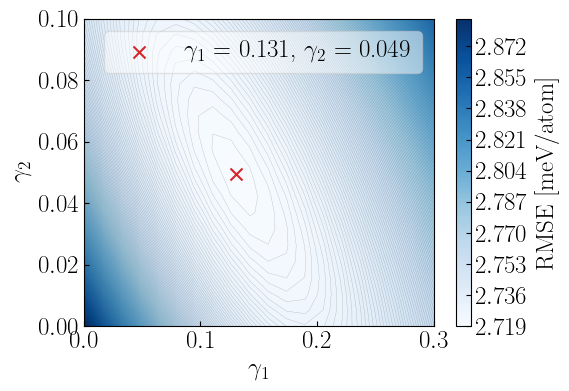

In [22]:
level = 175
plt.figure(figsize=(6,4.25))
plt.contour(X_, Y_, Z_, levels=level, alpha=0.25, linewidths=0.25,colors='black')
plt.contourf(X_, Y_, Z_, levels=level, cmap='Blues')
plt.colorbar(label='RMSE [meV/atom]')
plt.scatter(gamma_opt[0],gamma_opt[1], c ='tab:red',marker = 'x',s = 75, label=f'$\\gamma_1$ = {gamma_opt[0]:.3f}, $\\gamma_2$ = {gamma_opt[1]:.3f}')
plt.xlabel('$\\gamma_1$')
plt.ylabel('$\\gamma_2$')

plt.legend(framealpha = 0.5)
plt.tight_layout()
# plt.savefig('figs/contour_gamma.pdf')

In [25]:
def bic(theta, Np, cv_rmse, E):
    Nd = len(E)
    return -Nd * np.log(cv_rmse**2) - Np * np.log(Nd)

def aic(theta, Np, cv_rmse, E):
    Nd = len(E)
    return -Nd * np.log(cv_rmse**2) - 2 * Np

ridge_bic = bic(J_ridge, len(J_ridge), cv_rmse_ridge(optimal_alpha)[0], E_stand)
ridge_aic = aic(J_ridge, len(J_ridge), cv_rmse_ridge(optimal_alpha)[0], E_stand)
cov_bic = bic(J_cov, len(J_cov), cv_rmse_cov(gamma_opt)[0], E_stand)
cov_aic = aic(J_cov, len(J_cov), cv_rmse_cov(gamma_opt)[0], E_stand)
ols_bic = bic(J_ols, len(J_ols), cv_rmse_ols()[0], E_stand)
ols_aic = aic(J_ols, len(J_ols), cv_rmse_ols()[0], E_stand)

print(f'Ridge BIC: {ridge_bic}, AIC: {ridge_aic}')
print(f'OLS BIC: {ols_bic}, AIC: {ols_aic}')
print(f'Covariance BIC: {cov_bic}, AIC: {cov_aic}')

Ridge BIC: 513.3067827194262, AIC: 560.1366319653805
OLS BIC: 513.2890582855392, AIC: 560.1189075314935
Covariance BIC: 519.5361994397763, AIC: 566.3660486857306


## Task 4: Bayesian Cluster expansion (4.5p)


A full Bayesian analysis includes the hyperparameters for the prior distribution as parameters to be optimized, which means that they are also sampled and optimized in conjunction with the model parameters. This can be compared to the Covariance approach in Task 3, which finds a single optimal prior distribution. 

In this task, you will perform a full Bayesian analysis for the ECIs.

### Priors
For this problem you can use a gaussian prior for the ECIs with a zero mean and variance $\alpha ^2$. This can be defined as
\begin{equation}
P(\boldsymbol{J}) = \frac{1}{(2\pi \alpha^2)^{N_p/2}}\exp{(-||\boldsymbol{J}||^2 / 2\alpha^2)}
\end{equation}
where $N_p$ is the number of ECIs (length of vector $\boldsymbol{J}$). 

We assume homoscedastic errors in this task, and let $\sigma$ be the standard deviation in the likelihood.
For the priors over $\sigma$ and $\alpha$ you can for example use inverse gamma distributions. The total prior $P(\boldsymbol{J}, \sigma, \alpha)$  is then given by the product of all priors.

### Posterior
In this task you will generate cluster expansion models from the posterior probability distribution $P(\boldsymbol{J}|D)$, where $D$ is the training data (cluster-vectors and energies). The posterior is defined as
\begin{equation}
\underbrace{P(\boldsymbol{J}, \sigma^2, \alpha|D)}_\text{posterior} = \underbrace{P(D|\boldsymbol{J}, \sigma)}_\text{likelihood} \underbrace{P(\boldsymbol{J}, \sigma, \alpha)}_\text{prior}/P(D)
\end{equation}


**Tasks:**
* Define the (log) likelihood, (log) prior and (log) posterior functions.
* Sample the posterior distribution using MCMC and generate about 100-1000 (uncorrelated) samples (models).
* Visualize the ECIs for a MCMC chain.

**Discuss:**
* How many parameters seems "necessary" (non-zero) according to your MCMC sampling?
* What would happen if you had set your priors to something "unphysical", for instance to favor 3rd and 4th order clusters very highly?

*Hints:*
* `emcee` can be used for the MCMC sampling
* You may need to use a long burn-in period
* From previous tasks we know and $\sigma$ to be in the range 0.02-2 and $\alpha$ to be in the range 0.05-0.5.

**If you are using `emcee` for the MCMC sampling, please use the following code snippet when defining the sampler.**
This uses the `HDF` backend, which saves the sampling chain to a `.h5`-file instead of keeping it in memory. 
This is especially important if you are using the JupyterHub server, as otherwise the memory may fill up, decreasing the performance for everyone using the server. 

In [22]:
def log_likelihood(theta, E = E_stand, X = X_stand):
    if len(theta) == X.shape[1] + 2:
        J = theta[:-2]      # First 24 parameters in theta
        alpha = theta[-1]
        sigma = theta[-2]
    else:
        J = theta
        alpha = 1.0
        sigma = 1.0
    # print(E.shape)
    E_vec = E.reshape(-1)
    # print(E_vec.shape)
    resid = E_vec - X @ J

    return scipy.stats.norm.logpdf(resid, loc=0, scale=sigma).sum()


def log_prior(theta):
    if len(theta) == X.shape[1] + 2:
        J = theta[:-2]      # First 24 parameters in theta
        alpha = theta[-1]
        sigma = theta[-2]
    else:
        J = theta
        alpha = 1.0
        alpha = theta[-1]
        sigma = 1.0
    log_J_pri = scipy.stats.norm.logpdf(J, loc=0, scale=alpha).sum()
    log_sig_pri = scipy.stats.invgamma.logpdf(sigma, a=1, scale=1)
    log_alp_pri = scipy.stats.invgamma.logpdf(alpha, a=1, scale=1)
    # Unphysical priors
    # log_sig_pri = scipy.stats.invgamma.logpdf(sigma, a=0.001, scale=5)
    # log_alp_pri = scipy.stats.invgamma.logpdf(alpha, a=0.01, scale=500)
    return log_J_pri + log_sig_pri + log_alp_pri

def log_posterior(theta):
    lp = log_prior(theta)
    ll = log_likelihood(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + ll

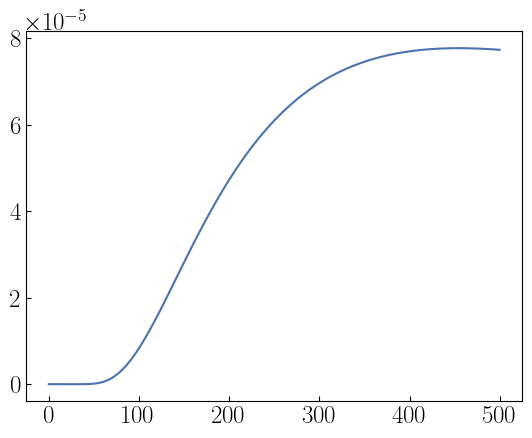

In [23]:
sigma = np.linspace(0.005, 10, 100)  # physical 0.05 - 0.5
alpha = np.linspace(0.02, 500, 100)   # physical 0.02 - 2
log_sig_pri = scipy.stats.invgamma.pdf(sigma, a=1, scale=5)
log_alp_pri = scipy.stats.invgamma.pdf(alpha, a=0.1, scale=500)


# plt.plot(sigma, log_sig_pri)
plt.plot(alpha, log_alp_pri)

In [24]:
print(len(J_ols))
log_posterior(J_ols)

24


-inf

In [25]:
def samples_MCMC2(theta_lims, function, nwalkers, iterations=10000, burninproc=0.05):
    """
    Run emcee for arbitrary parameter vector theta.

    Parameters
    ----------
    theta_lims : list[(low, high)]
        Bounds for each parameter (ndim = len(theta_lims)).
    function : callable
        Log-prob function: function(theta, x, y, sigma) -> logp (float).
    x, y : array-like
        Data.
    sigma : float or array-like
        Known observational uncertainties (as used by `function`).
    nwalkers : int
        Number of walkers (≥ 2*ndim recommended).
    iterations : int, optional
        Number of production steps (after burn-in). Default 10000.
    burninproc : float, optional
        Fraction of `iterations` used as burn-in. Default 0.10.

    Returns
    -------
    samples : (N, ndim) ndarray
        Flattened chain from production run.
    sampler : emcee.EnsembleSampler
        The sampler (for diagnostics).
    """

    # --- setup
    theta_lims = np.asarray(theta_lims, dtype=float)
    ndim = theta_lims.shape[0]
    rng = np.random.default_rng(1337)

    # --- initialize walkers uniformly within the bounds
    lows  = theta_lims[:, 0]
    highs = theta_lims[:, 1]
    p0 = rng.uniform(lows, highs, size=(nwalkers, ndim))

    # --- burn-in
    burnin = int(iterations * burninproc)
    sampler = emcee.EnsembleSampler(nwalkers, ndim, function)

    sampler.run_mcmc(p0, iterations, progress=True)

    samples = sampler.get_chain(flat=True)
    return sampler, samples

In [26]:
n_J = X_stand.shape[1]  # number of ECIs
ndim = n_J + 2          # J + sigma + alpha

theta_lims = np.zeros((ndim, 2))
alpha_lims = (0.05, 0.5)
sigma_lims = (0.02, 2.0)

for i in range(ndim):
    theta_lims[i] = (-1.0, 1.0)
    if i == ndim - 2:
        theta_lims[i] = sigma_lims
    if i == ndim - 1:
        theta_lims[i] = alpha_lims

sampler,samples = samples_MCMC2(theta_lims, log_posterior, 
                        nwalkers=70, iterations=int(2e4))

100%|██████████| 20000/20000 [03:10<00:00, 104.84it/s]


In [27]:
def autocorr(samples, max_lag):
    """
    samples: array of shape (n_samples, n_dim)
    max_lag: compute lags 0..max_lag-1

    returns: array of shape (max_lag, n_dim)
             acf[k, j] = autocorr of dimension j at lag k
    """
    samples = np.asarray(samples)
    n, d = samples.shape # sample, walk, parameter

    # center each dimension
    x = samples - samples.mean(axis=0, keepdims=True)

    # variance per dimension
    var = (x**2).mean(axis=0) - (x.mean(axis=0))**2   # shape (d,)
    
    acf = np.empty((max_lag, d), dtype=float)

    for k in range(max_lag):
        # x[0:n-k] and x[k:n] have shape (n-k, d)
        prod = x[:n-k] * x[k:]
        cov_k = prod.mean(axis=0)          # shape (d,)
        acf[k] = cov_k / var               # normalize

    return acf

def auto_time(acors):
    try:
        tau = 1/2 + np.sum(acors,axis=0)  # tau_int
    except:
        tau = 1/2 + np.sum(acors)
    return tau

def autocorr_generator(sampler, max_k):
    sample_walkers = sampler.get_chain(flat=False)
    print(sample_walkers.shape)

    _, n_walkers, n_params = sample_walkers.shape

    tau_exp = np.zeros(n_params)
    acors = np.zeros((max_k, n_walkers, n_params))

    # Generate autocorrelation and autocorrelation time for each parameter
    for j in range(n_params):
        # autocorr over steps for this parameter, each walker is a 'dimension'
        acor_j = autocorr(sample_walkers[:, :, j], max_lag=max_k)  # shape: (max_k, n_walkers)
        acors[:, :, j] = acor_j

        # mean over walkers
        rho_mean = np.mean(acor_j, axis=1)   # shape: (max_k,)

        # find lag where rho ≈ e^{-1}
        k_star = np.argmin(np.abs(rho_mean - np.exp(-1)))

        tau_exp[j] = k_star   # τ_exp per parameter ≈ lag where ACF hits e^{-1}

    return acors, tau_exp

acors, tau_exp = autocorr_generator(sampler, max_k=1000)

(20000, 70, 26)


In [28]:
def effective_sample_size(chain, tau_int):
    nsamples = chain.shape[0]
    n_eff = nsamples / (2 * tau_int)
    return n_eff

Max autocorrelation time~: 8520.0 = Number of samples for burn-in
(1000, 70, 26)


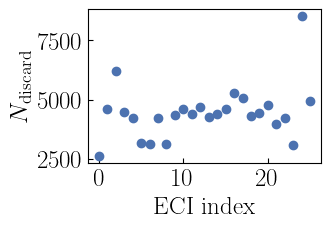

In [29]:
plt.figure(figsize=(3,2))
plt.plot(tau_exp*20, 'o')
plt.xlabel('ECI index')
plt.ylabel('$N_{{\\text{discard}}}$')

print(f'Max autocorrelation time~: {np.max(20*tau_exp)} = Number of samples for burn-in')
print(acors.shape)

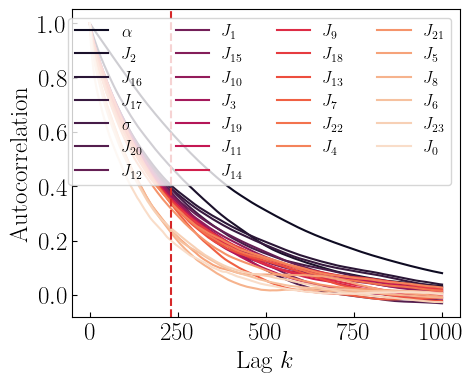

In [30]:
n_params = acors.shape[2]
colors = sns.color_palette("rocket", n_params)
order = np.argsort(tau_exp)[::-1]

plt.figure(figsize=(5,4))

for order, j in enumerate(order):
    rho_j = np.mean(acors[:, :, j], axis=1)  # mean over walkers
    if j == 24:
        plt.plot(rho_j, color=colors[order], label=r'$\alpha$')
    elif j == 25:
        plt.plot(rho_j, color=colors[order], label=r'$\sigma$')
    else:
        plt.plot(rho_j, color=colors[order], label=f'$J_{{{j}}}$')

plt.axvline(tau_exp[1], color='tab:red', linestyle='--')
plt.xlabel('Lag $k$')
plt.ylabel('Autocorrelation')
plt.legend(ncol=4, fontsize=12)
plt.show()

### Burn-in

In [31]:
samples_tot = sampler.get_chain(flat=True)
print(samples_tot.shape)

# Discard burn-in samples
N_discard = np.max(20*tau_exp)
n_walkers = sampler.get_chain(flat=False).shape[1]
N_discard_tot = int(N_discard * n_walkers)
print(f'Discarding {N_discard_tot} samples as burn-in.')
samples = samples_tot[N_discard_tot:, :]

print(samples.shape)
acf_mean = np.mean(acors, axis=(1,2))   # average over n_walkers and n_params
tau_int = auto_time(acf_mean)
print(tau_int)
print(f'Effective total mean sample size: {effective_sample_size(samples, tau_int)}')

(1400000, 26)
Discarding 596400 samples as burn-in.
(803600, 26)
220.80178877331034
Effective total mean sample size: 1819.7316345680258


In [32]:
# labels = [f'$J_{{{j}}}$' for j in range(ndim -2)] + [r'$\alpha$'] + [r'$\sigma$']
# fig = corner.corner(samples[:,:], labels=labels, color='tab:blue',
#                 show_titles=True, bins=30, plot_contours=True, plot_datapoints=True, 
#                 plot_density=True,quantiles=[0.16,0.5,0.84])

# fig.savefig('figs/corner_plot.pdf')

In [33]:
def running_mean(x, factor=0.01):
    it, walker = x.shape
    N = int(factor * it)
    average = np.zeros((it - N+1,walker))

    for i in range(walker):
        cumsum = np.cumsum(np.insert(x[:,i], 0, 0))
        average[:,i] = ((cumsum[N:] - cumsum[:-N]) / float(N))

    return average


def trace_plotter(samples):
    ndim = samples.shape[1]
    print(ndim)
    labels = [f'$J_{{{j}}}$' for j in range(ndim -2)] + [r'$\alpha$'] + [r'$\sigma$']
    fig, axes = plt.subplots(ndim, figsize=(4, 2.25 *ndim), sharex=True)
    mean = running_mean(samples)
    if ndim == 1:
        axes.plot(samples, "tab:blue", alpha=0.7)
        axes.plot(np.arange(len(mean)), mean, color='tab:red')
        axes.tick_params(direction='in')
        axes.set_ylabel('$\\Omega_{M,0}$')
        axes.set_xlabel("step number");
    else:
        for i,ax in zip(range(ndim),axes):
            ax.plot(samples[:, i], "tab:blue", alpha=0.7)
            ax.plot(np.arange(len(mean)), mean[:,i], color='tab:red')
            ax.set_ylabel(labels[i])
            ax.tick_params(direction='in')

        axes[-1].set_xlabel("step number");
    plt.tight_layout()
    # plt.savefig('figs/trace_plot.pdf')

26


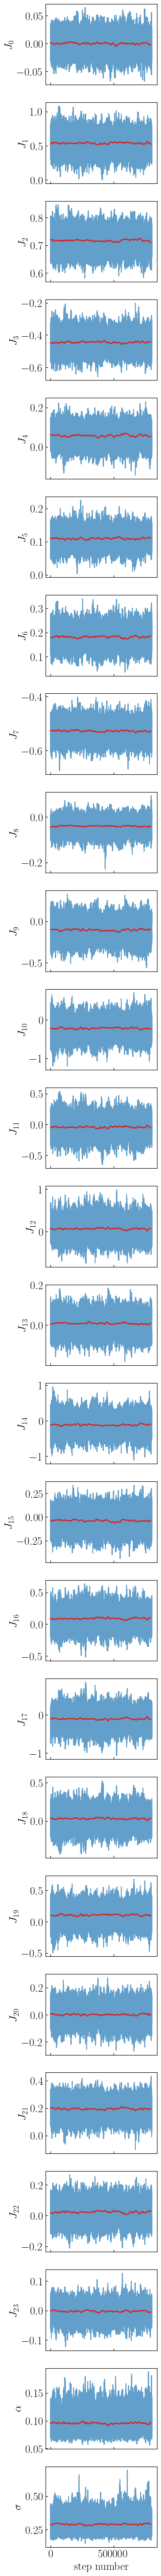

In [34]:
trace_plotter(samples)

In [35]:
# Bayesian non-zero ECIs via 95% credible intervals

# ECI samples (drop sigma and alpha)
J_samples = samples[:, :-2]         # shape: (N_samples, n_J)
n_J = J_samples.shape[1]

# Compute 2.5%, 50%, 97.5% quantiles for each ECI
q_low, q_med, q_high = np.quantile(J_samples, [0.025, 0.5, 0.975], axis=0)
# Alternatively, 16%, 50%, 84% quantiles
# q_low, q_med, q_high = np.quantile(J_samples, [0.16, 0.5, 0.84], axis=0)

# True if 0 is outside the 95% credible interval
non_zero_mask = (q_low > 0.0) | (q_high < 0.0)
n_active = np.sum(non_zero_mask)

print(f'Total number of ECIs (Bayesian): {n_J}')
print(f'Number of effectively non-zero ECIs (95% CI excludes 0): {n_active}\n')

# # Optional: detailed table
# for j in range(n_J):
#     status = 'non-zero' if non_zero_mask[j] else 'compatible with 0'
#     print(f'J[{j:2d}]: median = {q_med[j]: .4e}, 95% CI = [{q_low[j]: .4e}, {q_high[j]: .4e}] -> {status}')


alp_sig_samples = samples[:, -2:]  # shape: (N_samples, 2)

print(f'Alpha mean: {np.mean(alp_sig_samples[:,0]):.4f}, std: {np.std(alp_sig_samples[:,0]):.4f}')
print(f'Sigma mean: {np.mean(alp_sig_samples[:,1]):.4f}, std: {np.std(alp_sig_samples[:,1]):.4f}')

Total number of ECIs (Bayesian): 24
Number of effectively non-zero ECIs (95% CI excludes 0): 7

Alpha mean: 0.0955, std: 0.0135
Sigma mean: 0.2896, std: 0.0465


5


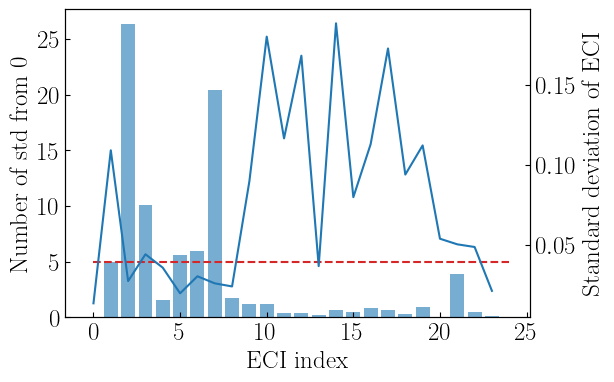

In [ ]:
std = np.std(J_samples, axis=0)
mean = np.mean(J_samples, axis=0)

# number of std's from 0 for each ECI
n_std_from_zero = np.abs(mean) / std

th = 3

fig, ax = plt.subplots(figsize=(6,4))

ax2 = ax.twinx()

ax.bar(range(len(n_std_from_zero)), n_std_from_zero, color='tab:blue', alpha=0.6)
ax.hlines(th, 0,24,color='tab:red', linestyle='--')
ax2.plot(std)
ax.set_xlabel('ECI index')
ax.set_ylabel('Number of std from 0')
ax2.set_ylabel('Standard deviation of ECI')
print(len(n_std_from_zero[n_std_from_zero>th]))

### Compare ECIs

In [36]:
J_bayes = np.mean(samples[:, :-2], axis=0)

In [23]:
J_dict = {
    'OLS': J_ols,
    'Ridge': J_ridge,
    'Cov': J_cov,
    'Bayes': J_bayes
}

# Physical units for ECIs
J_dict_phys = {
    'OLS': de_standardize_J(J_ols, scaler_X, scaler_E)[0]*1000,
    'Ridge': de_standardize_J(J_ridge, scaler_X, scaler_E)[0]*1000,
    'Cov': de_standardize_J(J_cov, scaler_X, scaler_E)[0]*1000,
    'Bayes': de_standardize_J(J_bayes, scaler_X, scaler_E)[0]*1000
}

print(J_dict_phys)

NameError: name 'J_bayes' is not defined

[1]
[2 3 4 5 6 7 8]
[ 9 10 11 12 13 14 15 16 17 18 19 20]
[21 22 23]


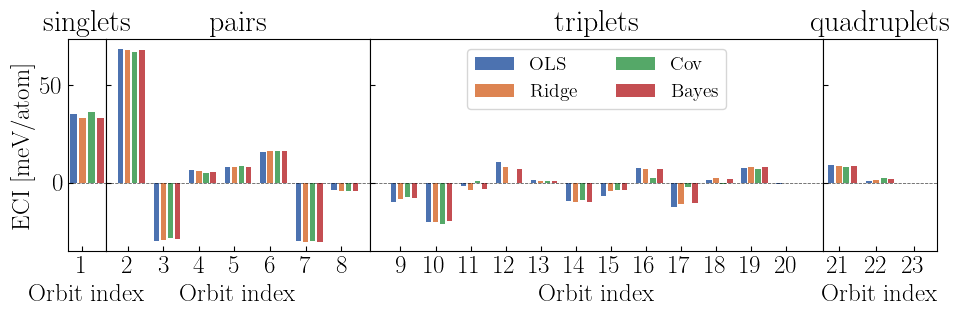

In [38]:
group_labels = {
    'singlets': [1],
    'pairs': np.arange(2, 9).tolist(),
    'triplets': np.arange(9, 21).tolist(),
    'quadruplets': np.arange(21, 24).tolist()
}

# --- subplot layout ---
widths = [len(g) for g in group_labels.values()]
fig, axes = plt.subplots(ncols=len(group_labels), figsize=(10, 3.5), sharey=True, gridspec_kw=dict(width_ratios=widths))

# --- visual spacing ---
wdt = 0.15
shift = wdt + 0.05
models = list(J_dict.keys())   # ['OLS', 'Ridge', 'Covariance', 'Bayesian']

# --- plot each group ---
for icol, (ax, (label, group)) in enumerate(zip(axes, group_labels.items())):
    
    idx = np.array(group)
    print(idx)
    pos = np.arange(len(idx))  # x-axis positions *within this group*

    # plot each model, offset in x
    for k, model in enumerate(models):
        J_vec = J_dict_phys[model]
        ax.bar(pos + k*shift, J_vec[idx], width=wdt, label=model)
        ax.axhline(0, color='black', lw=0.6, alpha=0.2, ls='--')
    
    ax.set_title(label)
    ax.set_xlabel("Orbit index")
    ax.set_xticks(pos + shift)       # center ticks
    ax.set_xticklabels(idx)          # show actual orbit indices

# Shared y-label
axes[0].set_ylabel("ECI [meV/atom]")

axes[2].legend(ncol=2,loc="upper center", fontsize=14)

plt.tight_layout()
fig.subplots_adjust(wspace=0.0)
# plt.savefig('figs/eci_comparison.pdf')
plt.show()

### Predict mixing energies

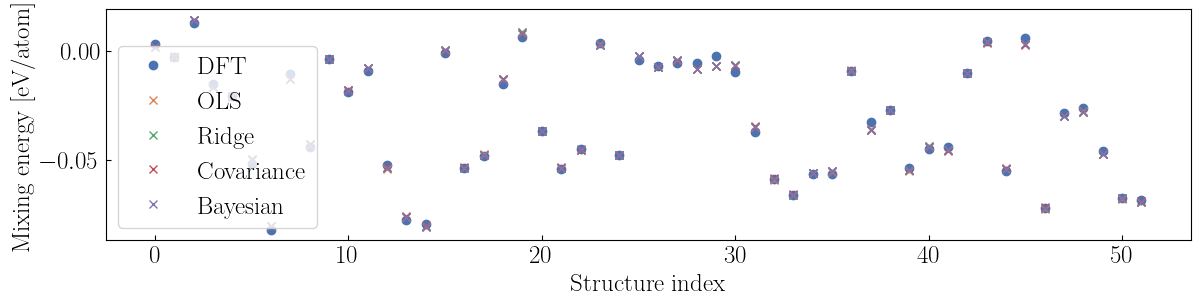

In [39]:
# Physical units for ECIs
J_ols_phys, b_ols = de_standardize_J(J_ols,  scaler_X, scaler_E)
J_ridge_phys, b_ridge = de_standardize_J(J_ridge, scaler_X, scaler_E)
J_cov_phys, b_cov = de_standardize_J(J_cov,  scaler_X, scaler_E)
J_bayes_phys, b_bayes = de_standardize_J(J_bayes, scaler_X, scaler_E)

E_dict_phys = {
    'OLS': pred_de_standardized(X, J_ols_phys, b_ols),
    'Ridge': pred_de_standardized(X, J_ridge_phys, b_ridge),
    'Covariance': pred_de_standardized(X, J_cov_phys, b_cov),
    'Bayesian': pred_de_standardized(X, J_bayes_phys, b_bayes),
}

plt.figure(figsize=(14,3))
plt.plot(conc_df['mixing_energy_per_atom'], 'o')

for E_pred in E_dict_phys.values():
    plt.plot(E_pred, 'x')

plt.xlabel('Structure index')
plt.ylabel('Mixing energy [eV/atom]')
plt.legend(['DFT'] + list(E_dict_phys.keys()), loc='lower left')

## Task 5: ARDR Feature selection (4p)

The techniques previously studied (Task 2-4) have been rather hands-on in that the user has quite a lot of control over how the parameter priors are constructed and optimized. Automatic Relevance Detection Regression (ARDR) on the other hand offers an automatic approach to optimizing the shape of the parameter priors, through several different shape parameters. In this task you will investigate how ARDR performs while varying a single shape parameter known as `threshold_lambda` in the [scikit-documentation for ARDR](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ARDRegression.html).  


Scan a range of values for the hyper-parameter and evaluate CV-error and IC to determine a good value for the hyper-parameters. Records also how many nonzero parameters you obtained.

To demonstrate the power of ARDR, increase the cutoffs in the cluster space to `[13,8,6]`, which greatly increases the number of parameters and makes the problem very overdetermined. 

**Tasks:**
* Compute the training and CV error for a range of values for `threshold_lambda`.
* Visualize the training error and CV-error as well as the AIC/BIC as function of number of non-zero parameters in the model.   

**Discuss:**
* How many features you think is suitable to include in a final model based on your analysis.
* Which ECIs are selected here? Is there a difference to OLS/Ridge/Covariance approach?

In [26]:
cs_ARDR = icet.ClusterSpace(prim, cutoffs=[13, 8, 6], chemical_symbols=['Au', 'Cu'])
print(cs_ARDR)

====================================== Cluster Space ======================================
 space group                            : Fm-3m (225)
 chemical species                       : ['Au', 'Cu'] (sublattice A)
 cutoffs                                : 13.0000 8.0000 6.0000
 total number of parameters             : 104
 number of parameters by order          : 0= 1  1= 1  2= 24  3= 43  4= 35
 fractional_position_tolerance          : 2e-06
 position_tolerance                     : 1e-05
 symprec                                : 1e-05
-------------------------------------------------------------------------------------------
index | order |  radius  | multiplicity | orbit_index | multicomponent_vector | sublattices
-------------------------------------------------------------------------------------------
   0  |   0   |   0.0000 |        1     |      -1     |           .           |      .     
   1  |   1   |   0.0000 |        1     |       0     |          [0]          |      A  

In [27]:
XA, conc_dfA = build_cluster_matrix(structures, mixing_energies, cs_ARDR)

print(f'X shape: {XA.shape}')
conc_dfA.describe()

X shape: (52, 104)


/var/folders/cc/g7htxfj57sq65d7g1185yzwr0000gn/T/ipykernel_34051/486745711.py:10: FutureWarning: Please use len(self) or, if your atoms are distributed, self.get_global_number_of_atoms.
  n = structure.get_number_of_atoms()


,Cu_fraction,Au_fraction,mixing_energy_per_atom,mixing_energy_total,n_atoms
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.493269,0.506731,-0.031421,-0.138891,4.250000
std,0.217914,0.217914,0.026958,0.120274,1.007326
min,0.000000,0.000000,-0.082404,-0.360872,1.000000
25%,0.333333,0.333333,-0.054040,-0.226541,4.000000
50%,0.500000,0.500000,-0.030561,-0.139230,5.000000
75%,0.666667,0.666667,-0.006713,-0.031008,5.000000
max,1.000000,1.000000,0.012795,0.030818,5.000000


Text(0, 0.5, 'Mixing energy (standardized)')

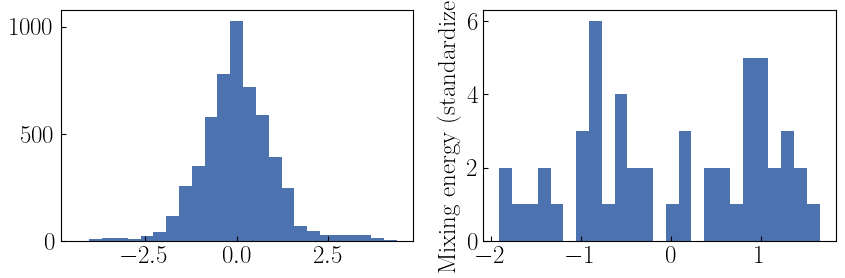

In [28]:
XA_stand, scaler_XA = standardize(XA)
XA_stand[:,0] = 1  # Set constant term to 1
EA_stand, scaler_EA = standardize(mixing_energies.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,3))
axes[0].hist(XA_stand.flatten(), bins=25)
axes[1].hist(EA_stand.flatten(), bins=25)
axes[1].set_ylabel('Mixing energy (standardized)')

### CV RMSE and BIC & AIC

In [29]:
def compute_mse(A, y, parameters):
    y_predicted = np.dot(A, parameters)
    dy = y - y_predicted
    mse = np.mean(dy**2)
    return mse

def cv_rmse_ardr(th_lambda, X_stand=XA_stand, E_stand=EA_stand):
    # Assuming validation and test data are the same here
    ardr_rmse_valid_folds = []
    ardr_rmse_train_folds = []
    n_J0 = []
    J = []

    E_phys = scaler_EA.inverse_transform(EA_stand.reshape(-1, 1)).ravel()

    for i, (train_index, test_index) in enumerate(kf.split(X_stand)):
        X_train, X_test, E_train, E_test, E_train_phys, E_test_phys = split_data(X_stand, E_stand, E_phys, train_index, test_index)

        E_train = E_train.ravel()
        E_test = E_test.ravel()

        # Fit data
        ardr = sklearn.linear_model.ARDRegression(threshold_lambda=th_lambda, fit_intercept=False, max_iter=50000, tol=1e-6)
        ardr.fit(X_train, E_train)

        # RMSE
        J_fold = ardr.coef_
        J.append(J_fold)

        n_J0.append(np.sum(J_fold != 0))


        # Predictions and RMSE in physical space
        ardr_rmse_valid_folds, ardr_rmse_train_folds = predict_phys_to_rmse(ardr_rmse_valid_folds, ardr_rmse_train_folds,
                                                                              X_train, X_test, J_fold, E_train_phys, E_test_phys)

    # Cross validate over the folds
    J = np.mean(J, axis=0)
    Nj0 = int((np.mean(n_J0)))
    cv_rmse_valid = np.mean(ardr_rmse_valid_folds)
    cv_rmse_train = np.mean(ardr_rmse_train_folds)

    return cv_rmse_valid, cv_rmse_train, Nj0, J


In [30]:
def log_likelihood_ARDR(theta, E=EA_stand, X=XA_stand):
    J = theta
    E_vec = E.reshape(-1)
    resid = E_vec - X @ J
    return scipy.stats.norm.logpdf(resid, loc=0, scale=1.0).sum()

# def bic(theta, Np, E=EA_stand,X=XA_stand):
#     Nd = len(E)
#     return 2 * log_likelihood_ARDR(theta) - Np * np.log(Nd)

# def aic(theta, Np,E=EA_stand,X=XA_stand):
#     return 2 * log_likelihood_ARDR(theta) - 2 * Np

def bic(theta, Np, cv_rmse, E=EA_stand):
    Nd = len(E)
    return -Nd * np.log(cv_rmse**2) - Np * np.log(Nd)

def aic(theta, Np, cv_rmse, E=EA_stand):
    Nd = len(E)
    return -Nd * np.log(cv_rmse**2) - 2 * Np

In [31]:
# Generate plotting data
cv_rmse_valid_vals_ARDR = []
cv_rmse_train_vals_ARDR = []
nj0 = []
bic_ardr = []
aic_ardr = []


lamth_pot_min = 0.01
lamth_pot_max = 1e5
lam_ths = np.logspace(np.log10(lamth_pot_min),np.log10(lamth_pot_max),100) #[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
#lam_ths = np.linspace(0,100,10)
for lam in lam_ths:
    rmse_test, rmse_train, j0, J = cv_rmse_ardr(lam)
    cv_rmse_valid_vals_ARDR.append(rmse_test)
    cv_rmse_train_vals_ARDR.append(rmse_train)
    nj0.append(j0)

    
    bic_ardr.append(bic(J, j0, rmse_test))
    aic_ardr.append(aic(J, j0, rmse_test))

ARDR min CV RMSE: 3.3611 meV/atom


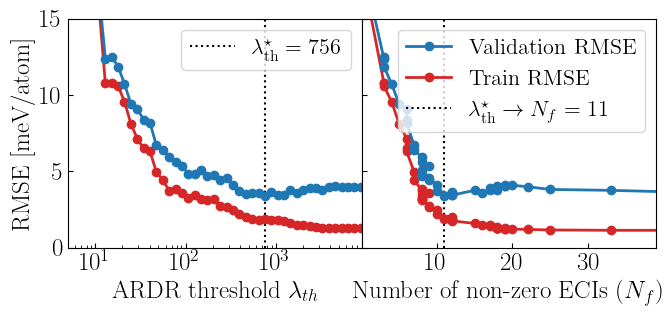

In [33]:
idx_rmse_min = np.argmin(np.array(cv_rmse_valid_vals_ARDR))
print(f'ARDR min CV RMSE: {cv_rmse_valid_vals_ARDR[idx_rmse_min]*1000:.4f} meV/atom')

fig, axes = plt.subplots(1, 2, figsize=(7,3.5), sharey=True)

label = f'$\\lambda_{{\\mathrm{{th}}}}^\\star \\rightarrow N_f={nj0[idx_rmse_min]}$'
# label = f'Features w/ $\\lambda_{{th}}^\\star$: {nj0[idx_rmse_min]}'

axes[1].axvline(nj0[idx_rmse_min], color='black', label=label, linestyle='dotted')
axes[1].plot(nj0, np.array(cv_rmse_train_vals_ARDR)*1000, '-o', label='Train RMSE', color='tab:red',lw = 2)
axes[1].plot(nj0, np.array(cv_rmse_valid_vals_ARDR)*1000, '-o', label='Validation RMSE', color='tab:blue',lw =  2)

axes[1].set_xlim(0.1, 39)
axes[1].set_ylim(0, 15)

axes[0].axvline(lam_ths[idx_rmse_min], color='black', linestyle='dotted', label=f'$\\lambda_{{\\mathrm{{th}}}}^\\star={lam_ths[idx_rmse_min]:.0f}$')
axes[0].semilogx(lam_ths, np.array(cv_rmse_train_vals_ARDR)*1000, '-o', color='tab:red',lw = 2)
axes[0].semilogx(lam_ths, np.array(cv_rmse_valid_vals_ARDR)*1000, '-o', color='tab:blue',lw = 2)

axes[0].set_xlim(5,0.9e4)

axes[1].set_xlabel('Number of non-zero ECIs ($N_f$)')
axes[0].set_ylabel('RMSE [meV/atom]')
#axes[1].set_ylabel('RMSE [meV/atom]')
axes[0].set_xlabel(r'ARDR threshold $\lambda_{th}$')

axes[0].legend(loc='upper right', fontsize=16)
axes[1].legend(reverse=True, fontsize=16)
fig.tight_layout()
fig.subplots_adjust(wspace=0.0)
# plt.savefig('figs/ardr_rmse.pdf')

ARDR BIC: 548.8680283292556, AIC: 570.3317092336513
3.361065627760125
3.361065627760125


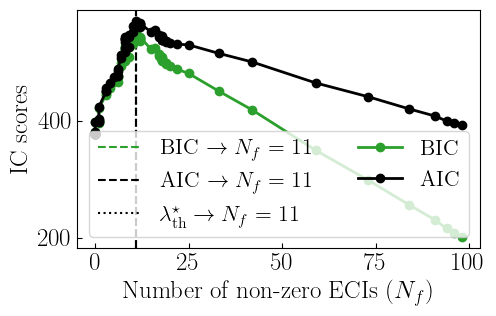

In [37]:
bic_idx = np.argmax(np.array(bic_ardr))
aic_idx = np.argmax(np.array(aic_ardr))
print(f'ARDR BIC: {np.max(np.array(bic_ardr))}, AIC: {np.max(np.array(aic_ardr))}')

fig, ax1 = plt.subplots(figsize=(5.3,3.5))

ax1.axvline(nj0[bic_idx], color='tab:green', linestyle='--', label=f'BIC $\\rightarrow N_f={nj0[bic_idx]}$')
ax1.axvline(nj0[aic_idx], color='black', linestyle='--', label=f'AIC $\\rightarrow N_f={nj0[aic_idx]}$')
ax1.axvline(nj0[idx_rmse_min], color='black', label=label, linestyle='dotted')
ax1.plot(nj0, bic_ardr, '-o', label='BIC', color='tab:green', lw =  2)
ax1.plot(nj0, aic_ardr, '-o', label='AIC', color='black',lw = 2)

ax1.set_xlabel('Number of non-zero ECIs ($N_f$)')
ax1.set_ylabel('IC scores')
#ax1.set_xlim(-3, 50)
#ax1.set_ylim(-300, -100)
ax1.legend(loc='lower right', ncol=2, fontsize=16)
plt.tight_layout()
# plt.savefig('figs/ardr_ic.pdf')

print(cv_rmse_ardr(lam_ths[bic_idx])[0]*1000)
print(cv_rmse_ardr(lam_ths[aic_idx])[0]*1000)

In [48]:
lam_opt = lam_ths[np.argmax(aic_ardr)]
idx_rmse_opt = np.argmin(cv_rmse_valid_vals_ARDR)
lam_opt = lam_ths[idx_rmse_opt]

ardr_final = sklearn.linear_model.ARDRegression(
    threshold_lambda=lam_opt,
    fit_intercept=False,
    max_iter=50000,
    tol=1e-6
)
ardr_final.fit(XA_stand, EA_stand.ravel())

J_ardr = ardr_final.coef_   # 11 features


# rmse_test, rmse_train, j0, J_ardr = cv_rmse_ardr(lam_opt)   # 26 features

N_f_final = np.sum(np.abs(J_ardr) != 0)
print("Final number of non-zero ECIs (ARDR):", N_f_final)
print("Indices:", np.where(np.abs(J_ardr) != 0)[0])

print(J_ardr)

J_dict['ARDR'] = J_ardr

Final number of non-zero ECIs (ARDR): 11
Indices: [ 1  2  3  5  6  7 27 76 84 85 88]
[ 0.          0.59000707  0.63298671 -0.24061795  0.          0.10365797
  0.16703123 -0.44162389  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.37797458  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.17851279  0.
  0.          0.          0.          0.          0.          

## Task 6: The ground state (3p)

In this final task, you will compare all the earlier techniques (Tasks 2-5) in predicting the ground state of candidate clusters.The ground-state structure refers to the structure with the lowest energy for a given concentration. Macroscopic properties like thermal conductivity, heat-capacity etc can depend strongly on the particular ground-state configuration and it is therefore important to know the correct ground-state structure.

In the database `ground_states_candidates.db` you will find potential ground-state candidates. In this task you will assign each ground-state candidate in the database an estimated energy, and use your results from task 4 to estimate the probability of each candidate being the actual ground-state.

**Tasks:**
* Use the models that you've studied in Tasks 2-5 to predict the ground state structure and energy.
    * From Task 2, use OLS and the RIDGE model with optimal hyperparameter that you found. 
    * From Task 3, use the optimal Covariance model that you found.
    * From Task 4, use the cluster-expansions samples (from MCMC) and compute the frequency of each candidate structure being the ground-state.
        * Also plot the disitrubtion of the ground-state energy.
    * From Task 5, use the ARDR model with the optimal hyperparameter that you found.
* Compare the results from predicting the ground state with Task 2-5 and discuss the results. 

**Discuss:**
* Can you spot any differences between the models in predicting the ground state? Why/why not?
* Which model approach do you think is the most suitable for this problem? (No right or wrong answer here; it's the discussion that's important)
    * In particular elaborate on the differences between automatic feature selection (such as Ridge/ARDR) and more hands-on, physical intuition based approaches (such as Covariance/Full Bayesian).

*Hints*
* Remember that the ECIs have previously been normalized. You will thus have to normalize the ground state candidate cluster vectors and transform the predicted energies back to the original energy scale. 

In [49]:
# Read ASE database and collect structures
gs_structures, gs_mixing_energies, gs_db = read_db('ground-state-candidates.db')

print(f'Loaded {len(gs_db)} structures.')

Loaded 57 structures.


In [50]:
prim = gs_db.get(formula='Au').toatoms()
gs_cs = icet.ClusterSpace(prim, cutoffs=[8, 6, 5], chemical_symbols=['Au', 'Cu'])
display(gs_cs)

Field,Value
Space group,Fm-3m (225)
Sublattice A,"('Au', 'Cu')"
Cutoffs,"[8, 6, 5]"
Total number of parameters,24
Number of parameters of order 0,1
Number of parameters of order 1,1
Number of parameters of order 2,7
Number of parameters of order 3,12
Number of parameters of order 4,3
fractional_position_tolerance,2e-06


In [51]:
# Build cluster-vector matrix X and a pandas DataFrame `conc_df` with composition and energies
X6, conc_df6 = build_cluster_matrix(gs_structures, gs_mixing_energies, gs_cs)

print(f'X shape: {X6.shape}')
print(conc_df6.head())

X shape: (57, 24)
   Cu_fraction  Au_fraction mixing_energy_per_atom mixing_energy_total  \
0     0.000000     1.000000                   None                None   
1     1.000000     0.000000                   None                None   
2     0.500000     0.500000                   None                None   
3     0.500000     0.500000                   None                None   
4     0.333333     0.666667                   None                None   

   n_atoms  
0        1  
1        1  
2        2  
3        2  
4        3  


/var/folders/cc/g7htxfj57sq65d7g1185yzwr0000gn/T/ipykernel_28985/486745711.py:10: FutureWarning: Please use len(self) or, if your atoms are distributed, self.get_global_number_of_atoms.
  n = structure.get_number_of_atoms()


In [52]:
prim_ardr = gs_db.get(formula='Au').toatoms()
gs_cs_ardr = icet.ClusterSpace(prim_ardr, cutoffs=[13, 8, 6], chemical_symbols=['Au', 'Cu'])

# Build cluster-vector matrix X and a pandas DataFrame `conc_df` with composition and energies
X6_ardr, conc_df6_ardr = build_cluster_matrix(gs_structures, gs_mixing_energies, gs_cs_ardr)
print(f'X shape: {X6_ardr.shape}')

/var/folders/cc/g7htxfj57sq65d7g1185yzwr0000gn/T/ipykernel_28985/486745711.py:10: FutureWarning: Please use len(self) or, if your atoms are distributed, self.get_global_number_of_atoms.
  n = structure.get_number_of_atoms()


X shape: (57, 104)


### Standardize

In [53]:
X6_stand, scaler_X6 = standardize(X6)
X6_stand[:,0] = 1  # Set constant term to 1

E6_stand, scaler_E6 = standardize(mixing_energies.reshape(-1, 1))

X6_stand_ardr, scaler_X6_ardr = standardize(X6_ardr)
X6_stand_ardr[:,0] = 1  # Set constant term to 1

E6_stand_ardr, scaler_E6_ardr = standardize(mixing_energies.reshape(-1, 1))

In [54]:
def predictions(standardized=False, X6_stand=X6_stand, X6=X6, X6_stand_ardr=X6_stand_ardr, X6_ardr=X6_ardr, 
                J_dict=J_dict,
                scaler_X6=scaler_X6, scaler_E6=scaler_E6,
                scaler_X6_ardr=scaler_X6_ardr, scaler_E6_ardr=scaler_E6_ardr):
    # if standardized:
    #     E_pred_dict_stand = {}
    #     for key in J_dict.keys():

    #         if not key == 'ARDR':
    #             # J = de_standardize_J(J_dict[key], scaler_X6, scaler_E6)
    #             
    # 
    # _stand[key] = pred(X6_stand, J_dict[key])
    #         else:
    #             E_pred_dict_stand[key] = pred(XA_stand, J_dict[key])
    #     return E_pred_dict_stand
    # else:
        XA = de_standardize(XA_stand, scaler_XA)

        E_pred_dict = {}
        for key in J_dict.keys():

            if not key == 'ARDR':
                J, intercept = de_standardize_J(J_dict[key], scaler_X6, scaler_E6)
                E_pred_dict[key] = pred_de_standardized(X6, J, intercept)
                # plt.hist(E_pred_dict[key], bins=40, alpha=0.5)
            else:
                J, intercept = de_standardize_J(J_dict[key], scaler_X6_ardr, scaler_E6_ardr)
                E_pred_dict[key] = pred_de_standardized(X6_ardr, J, intercept)
        return E_pred_dict

In [99]:
def plot_mixing_energies_preds(conc_df6, E_pred_dict, ax=None, size=(6,4)):
    E_min = []
    idx = np.unique(conc_df6['Cu_fraction'])
    for key in E_pred_dict.keys():
        # if not key == 'ARDR':
            for i in range(len(idx)):
                energies = E_pred_dict[key][idx[i] == conc_df6['Cu_fraction']]
                E_min.append(np.min(energies*1000))  # in meV/atom
            ax.plot(idx, E_min, '-x', label=rf'{key}')
            #plt.plot(conc_df6['Cu_fraction'], E_pred_dict[key]*1000, 'x', label = key)
            E_min = []


Conc. 0.00 gives [0] [100.]
Conc. 0.20 gives [35] [100.]
Conc. 0.25 gives [13 22 27] [ 3.6  5.6 90.8]
Conc. 0.33 gives [6] [100.]
Conc. 0.40 gives [36 37] [ 1.6 98.4]
Conc. 0.50 gives [3] [100.]
Conc. 0.60 gives [39] [100.]
Conc. 0.67 gives [7] [100.]
Conc. 0.75 gives [15 24 28] [ 1.6 17.2 81.2]
Conc. 0.80 gives [56] [100.]
Conc. 1.00 gives [1] [100.]


Text(0.5, 0, 'Structure index')

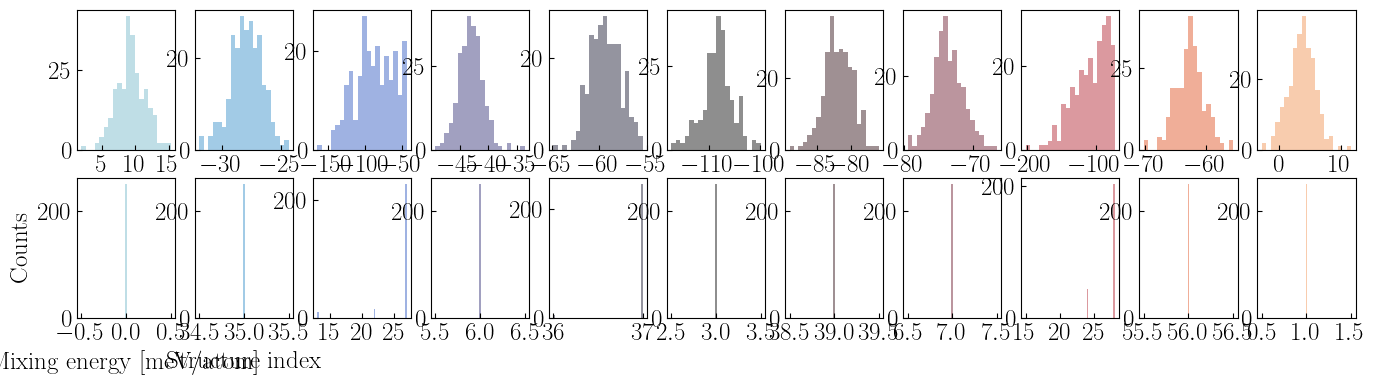

In [57]:
J_bayes = samples[:, :-2].mean(axis=0)

Nsamp = 250
rng = np.random.default_rng(42)
sample_idx = rng.choice(len(samples), size=Nsamp, replace=False)

# E_samp_phys = np.zeros(Nsamp)
# idxs = []

idx_conc = np.unique(conc_df6['Cu_fraction'])

fig, axs = plt.subplots(2, len(idx_conc), figsize=(1.5*len(idx_conc), 4))
colors = sns.color_palette("icefire", len(idx_conc))

for j, conc in enumerate(idx_conc):
    E_samp_phys = np.zeros(Nsamp)
    idxs = []
    for i, idx in enumerate(sample_idx):
        J_samp = samples[idx, :-2]
        J_samp_phys, b_samp = de_standardize_J(J_samp, scaler_X6, scaler_E6)
        E_pred_phys = pred_de_standardized(X6, J_samp_phys, b_samp)
        energies = E_pred_phys[conc == conc_df6['Cu_fraction']]

        E_samp_phys[i] = np.min(energies)   

        idxs.append(np.where(E_pred_phys == np.min(energies))[0][0])


    axs[0, j].hist(E_samp_phys.flatten()*1000, bins=20, alpha=0.5, color=colors[j], label=f'Conc. {conc:.2f}')
    axs[1, j].hist(idxs, bins=len(conc_df6), alpha=0.5, color=colors[j])
    axs[1, 0].set_ylabel('Counts')
    
    print(f'Conc. {conc:.2f} gives {np.unique(idxs, return_counts=True)[0]} {np.unique(idxs, return_counts=True)[1]/2.5}')


axs[1, 0].set_xlabel('Mixing energy [meV/atom]')
axs[1, 1].set_xlabel('Structure index')

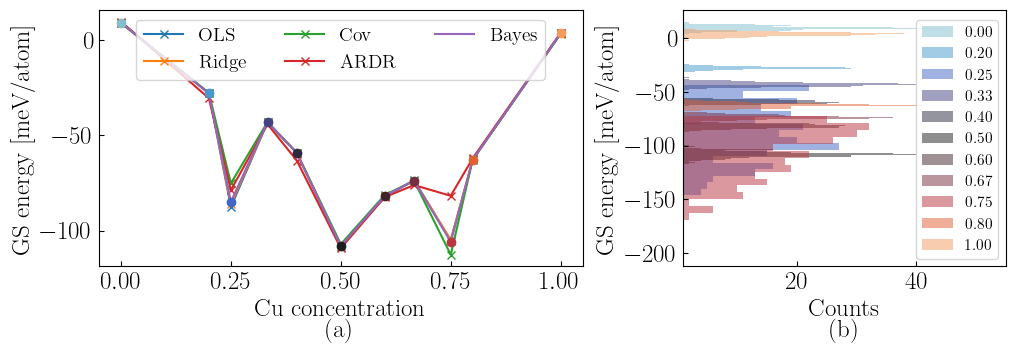

In [177]:
# Compute Bayesian ground-state energy samples
Nsamp = 250
rng = np.random.default_rng(42)
sample_idx = rng.choice(len(samples), size=Nsamp, replace=False)

idx_conc = np.unique(conc_df6['Cu_fraction'])

# Store distributions for plotting (in meV)
E_gs_samples = {conc: [] for conc in idx_conc}

for conc in idx_conc:
    E_samp_phys = np.zeros(Nsamp)
    for k, idx in enumerate(sample_idx):
        J_samp = samples[idx, :-2]
        J_samp_phys, b_samp = de_standardize_J(J_samp, scaler_X6, scaler_E6)

        E_pred_phys = pred_de_standardized(X6, J_samp_phys, b_samp)
        energies = E_pred_phys[conc == conc_df6['Cu_fraction']]

        E_samp_phys[k] = np.min(energies)

    E_gs_samples[conc] = E_samp_phys * 1000.0


# Predictions from OLS / Ridge / Cov / ARDR / Bayes
E_pred_dict = predictions(standardized=False, J_dict=J_dict)

# Split into "non-Bayes" and "Bayes-only" dictionaries
E_pred_dict_no_bayes = {
    k: v for k, v in E_pred_dict.items() if "bayes" not in k.lower()
}
E_pred_dict_bayes = {
    k: v for k, v in E_pred_dict.items() if "bayes" in k.lower()
}

# Combine 3 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10.5, 4), gridspec_kw={'width_ratios': [1.5, 1]})

# --- Left: non-Bayes models ---
sns.set_palette("tab10")
plot_mixing_energies_preds(conc_df6, E_pred_dict_no_bayes, ax=ax1)
ax1.set_ylabel(r"GS energy [meV/atom]")
ax1.set_xlabel("Cu concentration")
ax1.text(0.5, -0.25, "(a)", transform=ax1.transAxes, ha="center", va="center", fontsize=18)
ax1.set_xticks([0.0, 0.25, 0.5, 0.75, 1.0])
# ax1.legend(ncol=2, fontsize=16, framealpha=1)


# --- Bayes only, colored per concentration ---
# Compute Bayes ground-state curve
bayes_key, bayes_pred = next(iter(E_pred_dict_bayes.items()))

E_min_bayes = []
for conc in idx_conc:
    energies = bayes_pred[conc == conc_df6['Cu_fraction']]
    E_min_bayes.append(np.min(energies) * 1000.0)  # meV/atom

colors = sns.color_palette("icefire", len(idx_conc))

# plot one colored dot per concentration, matching histogram colors
for i, conc in enumerate(idx_conc):
    ax1.plot(conc, E_min_bayes[i], 'o', color=colors[i], alpha=1, zorder=6)#, label=f"{conc:.2f}")

ax1.plot(idx_conc, E_min_bayes, '-', color='tab:purple', zorder=5, label='Bayes')
# ax1.set_xlabel("Cu concentration")
# ax1.text(0.5, -0.34, "(b)", transform=ax2.transAxes, ha="center", va="center", fontsize=18)
# ax1.set_xticks([0.25, 0.5, 0.75, 1.0])



# --- Right: Bayesian GS energy distributions ---
for i, conc in enumerate(idx_conc):
    ax2.hist(E_gs_samples[conc], bins=20, alpha=0.5, color=colors[i], label=f"{conc:.2f}", orientation='horizontal')

ax2.set_xlabel("Counts")
ax2.text(0.5, -0.25, "(b)", transform=ax2.transAxes, ha="center", va="center", fontsize=18)
ax2.set_ylabel(r"GS energy [meV/atom]")

#ax1.set_ylim(-180, 20)
ax2.set_xlim(1, 55)
#ax2.set_yticks([])

ax1.legend(ncol=3, fontsize=14, framealpha=0.8)

handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles2, labels2, ncol=1, fontsize=11, loc='lower right')

plt.tight_layout()
fig.subplots_adjust(wspace=0.25)
plt.savefig("figs/gs_predictions_plus_bayes_2panel.pdf")